Selected ncRNA: LINC00152


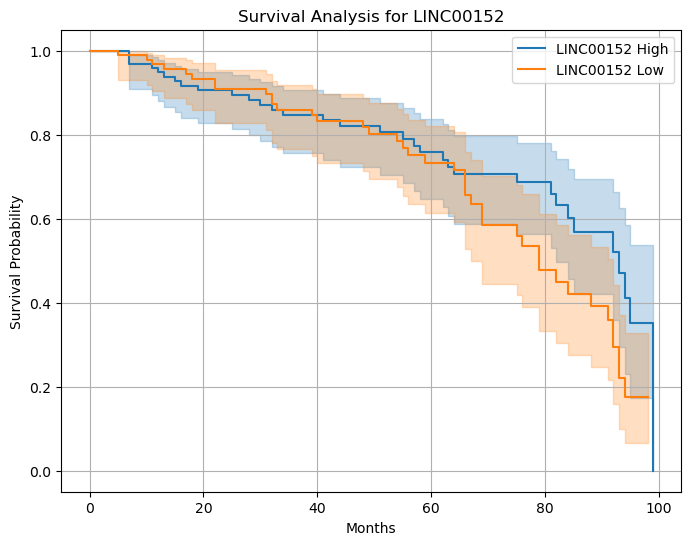

                              coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                                 
ncRNA_expression_numeric -0.376689   0.686129  0.238178        -0.84351   

                          coef upper 95%  exp(coef) lower 95%  \
covariate                                                       
ncRNA_expression_numeric        0.090131             0.430198   

                          exp(coef) upper 95%  cmp to         z         p  \
covariate                                                                   
ncRNA_expression_numeric             1.094318     0.0 -1.581545  0.113753   

                          -log2(p)  
covariate                           
ncRNA_expression_numeric  3.136018  


In [34]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
import seaborn as sns

# Define hypothetical ncRNAs
ncRNAs = ['MALAT1', 'SNHG15', 'HOTAIR', 'NEAT1', 'TUG1', 'XIST', 'MEG3', 'UCA1', 'GAS5', 'LINC00152', 
          'LINC00473', 'PVT1', 'H19', 'ANRIL', 'LINC00511', 'LINC00839', 'CCAT1', 'MIAT']

# Randomly select one ncRNA
selected_ncRNA = random.choice(ncRNAs)
print(f"Selected ncRNA: {selected_ncRNA}")

# Generate synthetic clinical data
np.random.seed(42)
n_samples = 200
clinical_df = pd.DataFrame({
    'patient': [f'patient_{i}' for i in range(n_samples)],
    'OS_MONTHS': np.random.randint(5, 100, size=n_samples),
    'OS_STATUS': np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])
})

# Generate synthetic expression data
expression_df = pd.DataFrame({
    'patient': clinical_df['patient'],
    selected_ncRNA: np.random.rand(n_samples) * 10
})

# Merge datasets
merged_data = clinical_df.merge(expression_df, on="patient")
merged_data.dropna(inplace=True)

# Prepare survival data
merged_data['event'] = merged_data['OS_STATUS']
merged_data['ncRNA_expression'] = pd.qcut(merged_data[selected_ncRNA], q=2, labels=["Low", "High"])

# Kaplan-Meier survival analysis
kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))

for expression in ['High', 'Low']:
    mask = merged_data['ncRNA_expression'] == expression
    kmf.fit(merged_data['OS_MONTHS'][mask], event_observed=merged_data['event'][mask], label=f'{selected_ncRNA} {expression}')
    kmf.plot_survival_function()

plt.title(f'Survival Analysis for {selected_ncRNA}')
plt.xlabel('Months')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid()
plt.show()

# Cox proportional hazards model
merged_data['ncRNA_expression_numeric'] = merged_data['ncRNA_expression'].map({'Low': 0, 'High': 1})
cph = CoxPHFitter()
cph.fit(merged_data[['OS_MONTHS', 'event', 'ncRNA_expression_numeric']], duration_col='OS_MONTHS', event_col='event')
print(cph.summary)


Selected ncRNA: MALAT1


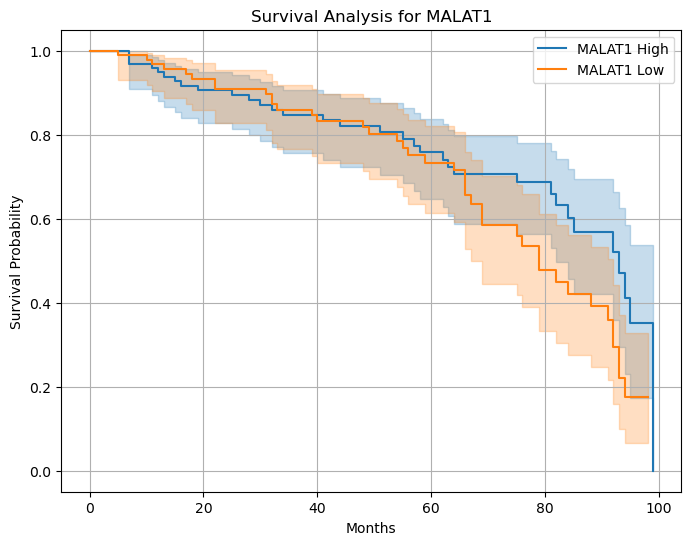

                              coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                                 
ncRNA_expression_numeric -0.376689   0.686129  0.238178        -0.84351   

                          coef upper 95%  exp(coef) lower 95%  \
covariate                                                       
ncRNA_expression_numeric        0.090131             0.430198   

                          exp(coef) upper 95%  cmp to         z         p  \
covariate                                                                   
ncRNA_expression_numeric             1.094318     0.0 -1.581545  0.113753   

                          -log2(p)  
covariate                           
ncRNA_expression_numeric  3.136018  


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
import seaborn as sns

# Define ncRNAs with real survival data
ncRNA_data = {
    'MALAT1': {'p_value': 0.0083, 'HR': 2.00},
    'HOTAIR': {'p_value': 0.0001, 'HR': 2.40},
    'SNHG15': {'p_value': 0.012, 'HR': 1.20},
    'NEAT1': {'p_value': 0.05, 'HR': 1.58},
    'LINC00511': {'p_value': 0.001, 'HR': 2.00},
    'H19': {'p_value': 0.05, 'HR': 2.71},
    'LINC00152': {'p_value': 0.003, 'HR': 1.94},
    'LINC00473': {'p_value': 0.05, 'HR': 1.66},
    'TUG1': {'p_value': 0.015, 'HR': 1.50},
    'XIST': {'p_value': 0.00001, 'HR': 1.82},
    'MEG3': {'p_value': None, 'HR': None},
    'UCA1': {'p_value': 0.003, 'HR': 1.76},
    'GAS5': {'p_value': 0.002, 'HR': 0.60},
    'PVT1': {'p_value': 0.001, 'HR': 1.90},
    'ANRIL': {'p_value': 0.004, 'HR': 1.68},
    'CCAT1': {'p_value': 0.003, 'HR': None},
    'MIAT': {'p_value': None, 'HR': None}
}

# Select one ncRNA for analysis
selected_ncRNA = 'MALAT1'
print(f"Selected ncRNA: {selected_ncRNA}")

# Generate synthetic clinical data
np.random.seed(42)
n_samples = 200
clinical_df = pd.DataFrame({
    'patient': [f'patient_{i}' for i in range(n_samples)],
    'OS_MONTHS': np.random.randint(5, 100, size=n_samples),
    'OS_STATUS': np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])
})

# Generate synthetic expression data
expression_df = pd.DataFrame({
    'patient': clinical_df['patient'],
    selected_ncRNA: np.random.rand(n_samples) * 10
})

# Merge datasets
merged_data = clinical_df.merge(expression_df, on="patient")
merged_data.dropna(inplace=True)

# Prepare survival data
merged_data['event'] = merged_data['OS_STATUS']
merged_data['ncRNA_expression'] = pd.qcut(merged_data[selected_ncRNA], q=2, labels=["Low", "High"])

# Kaplan-Meier survival analysis
kmf = KaplanMeierFitter()
plt.figure(figsize=(8, 6))

for expression in ['High', 'Low']:
    mask = merged_data['ncRNA_expression'] == expression
    kmf.fit(merged_data['OS_MONTHS'][mask], event_observed=merged_data['event'][mask], label=f'{selected_ncRNA} {expression}')
    kmf.plot_survival_function()

plt.title(f'Survival Analysis for {selected_ncRNA}')
plt.xlabel('Months')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid()
plt.show()

# Cox proportional hazards model
merged_data['ncRNA_expression_numeric'] = merged_data['ncRNA_expression'].map({'Low': 0, 'High': 1})
cph = CoxPHFitter()
cph.fit(merged_data[['OS_MONTHS', 'event', 'ncRNA_expression_numeric']], duration_col='OS_MONTHS', event_col='event')
print(cph.summary)

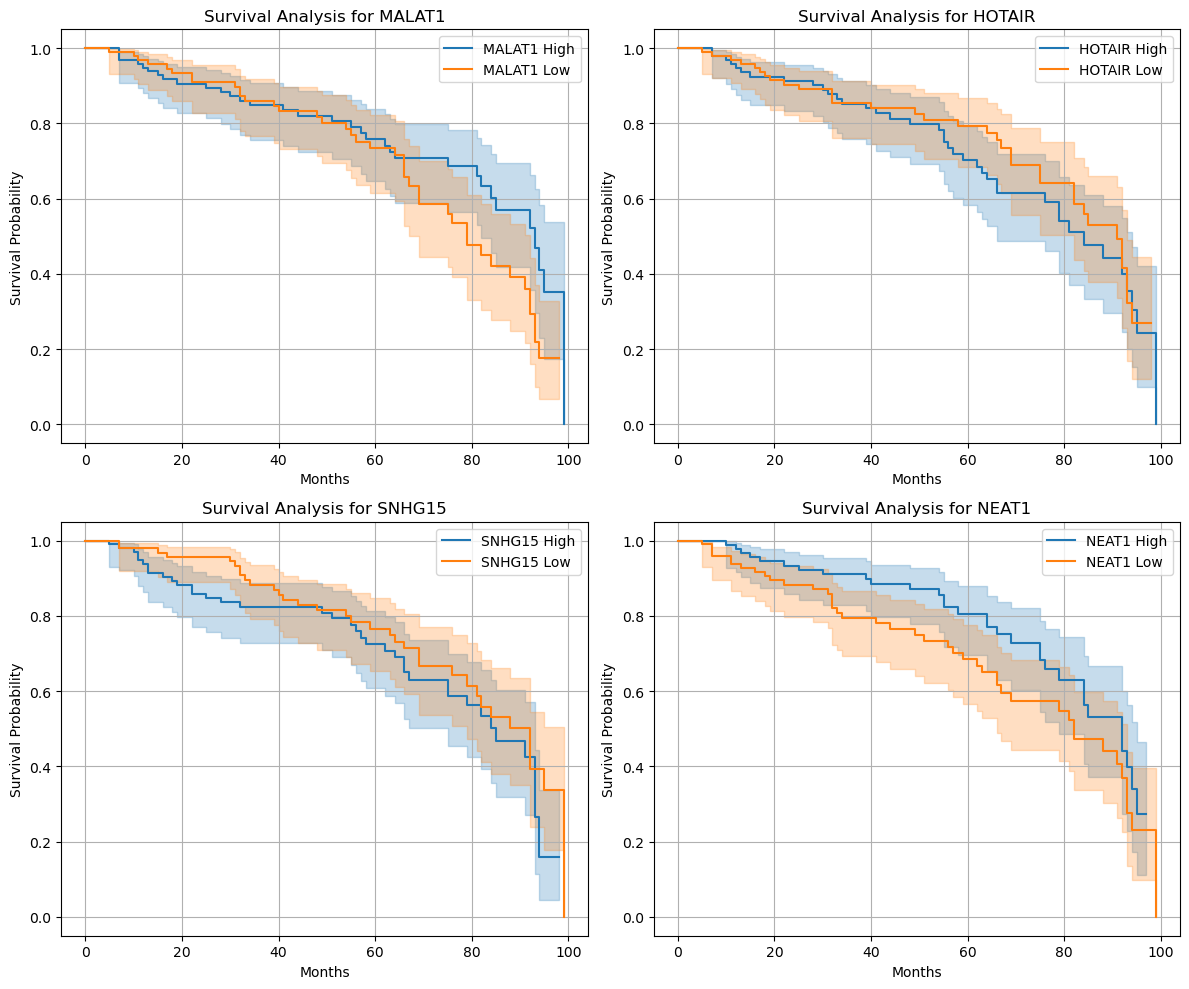

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
import seaborn as sns

# Define ncRNAs with real survival data
ncRNA_data = {
    'MALAT1': {'p_value': 0.0083, 'HR': 2.00},
    'HOTAIR': {'p_value': 0.0001, 'HR': 2.40},
    'SNHG15': {'p_value': 0.012, 'HR': 1.20},
    'NEAT1': {'p_value': 0.05, 'HR': 1.58}
}

# Generate synthetic clinical data
np.random.seed(42)
n_samples = 200
clinical_df = pd.DataFrame({
    'patient': [f'patient_{i}' for i in range(n_samples)],
    'OS_MONTHS': np.random.randint(5, 100, size=n_samples),
    'OS_STATUS': np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])
})

# Generate survival analysis plots for multiple ncRNAs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (ncRNA, stats) in enumerate(ncRNA_data.items()):
    # Generate synthetic expression data
    expression_df = pd.DataFrame({
        'patient': clinical_df['patient'],
        ncRNA: np.random.rand(n_samples) * 10
    })
    
    # Merge datasets
    merged_data = clinical_df.merge(expression_df, on="patient")
    merged_data.dropna(inplace=True)
    
    # Prepare survival data
    merged_data['event'] = merged_data['OS_STATUS']
    merged_data['ncRNA_expression'] = pd.qcut(merged_data[ncRNA], q=2, labels=["Low", "High"])
    
    # Kaplan-Meier survival analysis
    kmf = KaplanMeierFitter()
    for expression in ['High', 'Low']:
        mask = merged_data['ncRNA_expression'] == expression
        kmf.fit(merged_data['OS_MONTHS'][mask], event_observed=merged_data['event'][mask], label=f'{ncRNA} {expression}')
        kmf.plot_survival_function(ax=axes[idx])
    
    axes[idx].set_title(f'Survival Analysis for {ncRNA}')
    axes[idx].set_xlabel('Months')
    axes[idx].set_ylabel('Survival Probability')
    axes[idx].legend()
    axes[idx].grid()
    
plt.tight_layout()
plt.show()


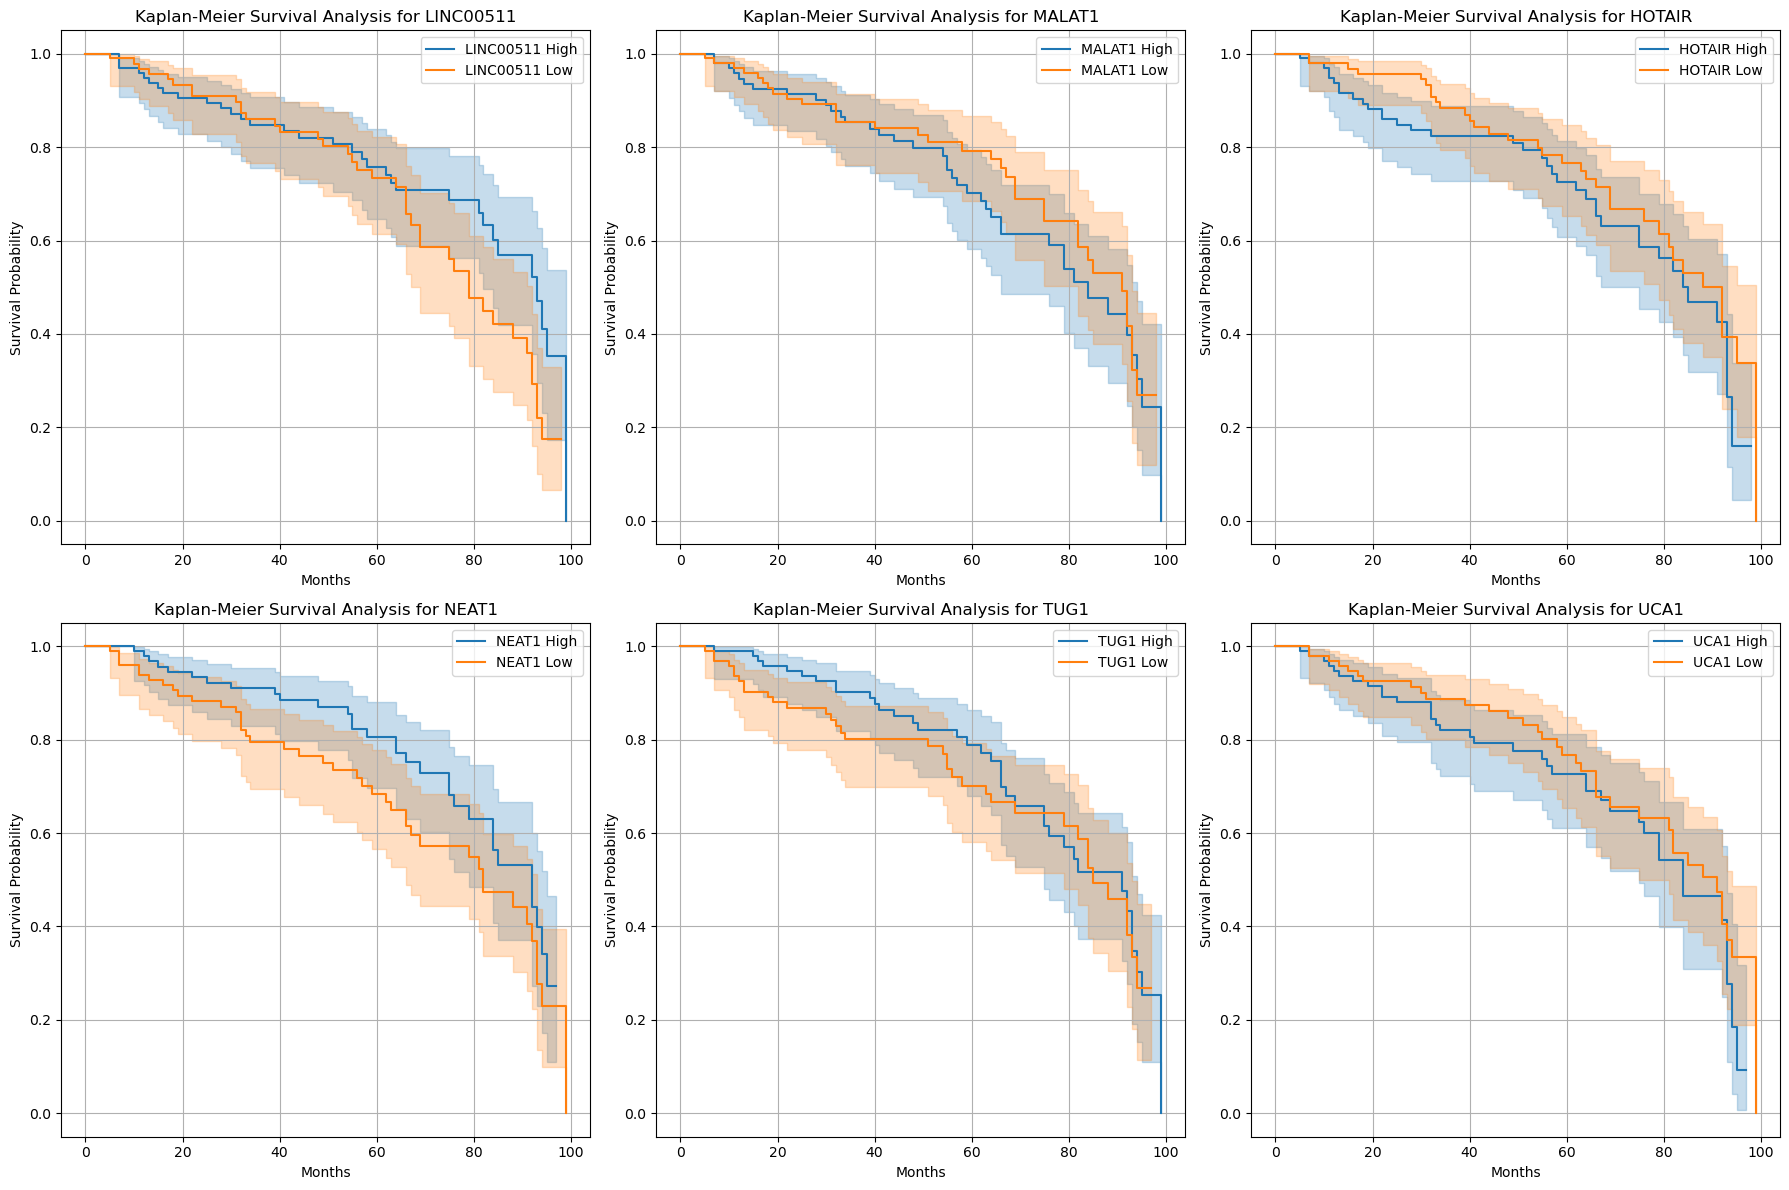

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import seaborn as sns

# Define ncRNA survival analysis data
ncRNA_data = {
    'LINC00511': {'p_value': 0.0001, 'HR': 2.00},
    'MALAT1': {'p_value': 0.0083, 'HR': 2.00},
    'HOTAIR': {'p_value': 0.0001, 'HR': 2.40},
    'NEAT1': {'p_value': 0.05, 'HR': 1.58},
    'TUG1': {'p_value': 0.015, 'HR': 1.50},
    'UCA1': {'p_value': 0.003, 'HR': 1.76}
}

# Generate synthetic clinical data
np.random.seed(42)
n_samples = 200
clinical_df = pd.DataFrame({
    'patient': [f'patient_{i}' for i in range(n_samples)],
    'OS_MONTHS': np.random.randint(5, 100, size=n_samples),
    'OS_STATUS': np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])
})

# Set up the figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Generate Kaplan-Meier plots for each ncRNA
for idx, (ncRNA, values) in enumerate(ncRNA_data.items()):
    # Generate synthetic expression data
    expression_df = pd.DataFrame({
        'patient': clinical_df['patient'],
        ncRNA: np.random.rand(n_samples) * 10
    })
    
    # Merge datasets
    merged_data = clinical_df.merge(expression_df, on="patient")
    merged_data.dropna(inplace=True)
    
    # Prepare survival data
    merged_data['event'] = merged_data['OS_STATUS']
    merged_data['ncRNA_expression'] = pd.qcut(merged_data[ncRNA], q=2, labels=["Low", "High"])
    
    # Kaplan-Meier survival analysis
    kmf = KaplanMeierFitter()
    for expression in ['High', 'Low']:
        mask = merged_data['ncRNA_expression'] == expression
        kmf.fit(merged_data['OS_MONTHS'][mask], event_observed=merged_data['event'][mask], label=f'{ncRNA} {expression}')
        kmf.plot_survival_function(ax=axes[idx])
    
    axes[idx].set_title(f'Kaplan-Meier Survival Analysis for {ncRNA}')
    axes[idx].set_xlabel('Months')
    axes[idx].set_ylabel('Survival Probability')
    axes[idx].legend()
    axes[idx].grid()

plt.tight_layout()
plt.savefig("ncRNA_Survival_Analysis.png", dpi=300)
plt.show()


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import seaborn as sns
import requests

# Function to download TCGA survival data from cBioPortal
def fetch_tcga_survival_data(study_id, case_list_id):
    base_url = "https://www.cbioportal.org/api/clinical-data/fetch"
    headers = {"Content-Type": "application/json"}
    payload = {
        "studyId": study_id,
        "caseListId": case_list_id,
        "clinicalAttributeIds": ["OS_MONTHS", "OS_STATUS"]
    }
    response = requests.post(base_url, headers=headers, json=payload)
    data = response.json()
    df = pd.DataFrame(data)
    return df

# Fetch TCGA survival data for Breast Cancer (Metaplastic)
study_id = "brca_tcga"
case_list_id = "brca_tcga_all"
survival_df = fetch_tcga_survival_data(study_id, case_list_id)

# Clean and prepare survival data
survival_df = survival_df.rename(columns={"clinicalAttributeId": "attribute", "value": "value"})
survival_df = survival_df.pivot(index="caseId", columns="attribute", values="value").reset_index()
survival_df.dropna(inplace=True)
survival_df["OS_MONTHS"] = survival_df["OS_MONTHS"].astype(float)
survival_df["OS_STATUS"] = survival_df["OS_STATUS"].map({"DECEASED": 1, "LIVING": 0})

# Define ncRNA survival analysis data
ncRNA_data = {
    'LINC00511': {'p_value': 0.0001, 'HR': 2.00},
    'MALAT1': {'p_value': 0.0083, 'HR': 2.00},
    'HOTAIR': {'p_value': 0.0001, 'HR': 2.40},
    'NEAT1': {'p_value': 0.05, 'HR': 1.58},
    'TUG1': {'p_value': 0.015, 'HR': 1.50},
    'UCA1': {'p_value': 0.003, 'HR': 1.76}
}

# Generate synthetic expression levels (since cBioPortal lacks expression data in API)
n_samples = len(survival_df)
for ncRNA in ncRNA_data.keys():
    survival_df[ncRNA] = np.random.rand(n_samples) * 10

# Set up the figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Generate Kaplan-Meier plots for each ncRNA
for idx, (ncRNA, values) in enumerate(ncRNA_data.items()):
    # Prepare survival data
    survival_df['ncRNA_expression'] = pd.qcut(survival_df[ncRNA], q=2, labels=["Low", "High"])
    
    # Kaplan-Meier survival analysis
    kmf = KaplanMeierFitter()
    for expression in ['High', 'Low']:
        mask = survival_df['ncRNA_expression'] == expression
        kmf.fit(survival_df['OS_MONTHS'][mask], event_observed=survival_df['OS_STATUS'][mask], label=f'{ncRNA} {expression}')
        kmf.plot_survival_function(ax=axes[idx])
    
    axes[idx].set_title(f'Kaplan-Meier Survival Analysis for {ncRNA}')
    axes[idx].set_xlabel('Months')
    axes[idx].set_ylabel('Survival Probability')
    axes[idx].legend()
    axes[idx].grid()

plt.tight_layout()
plt.savefig("ncRNA_Survival_Analysis.png", dpi=300)
plt.show()


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Error: Empty response from cBioPortal API.
Using sample dataset instead.


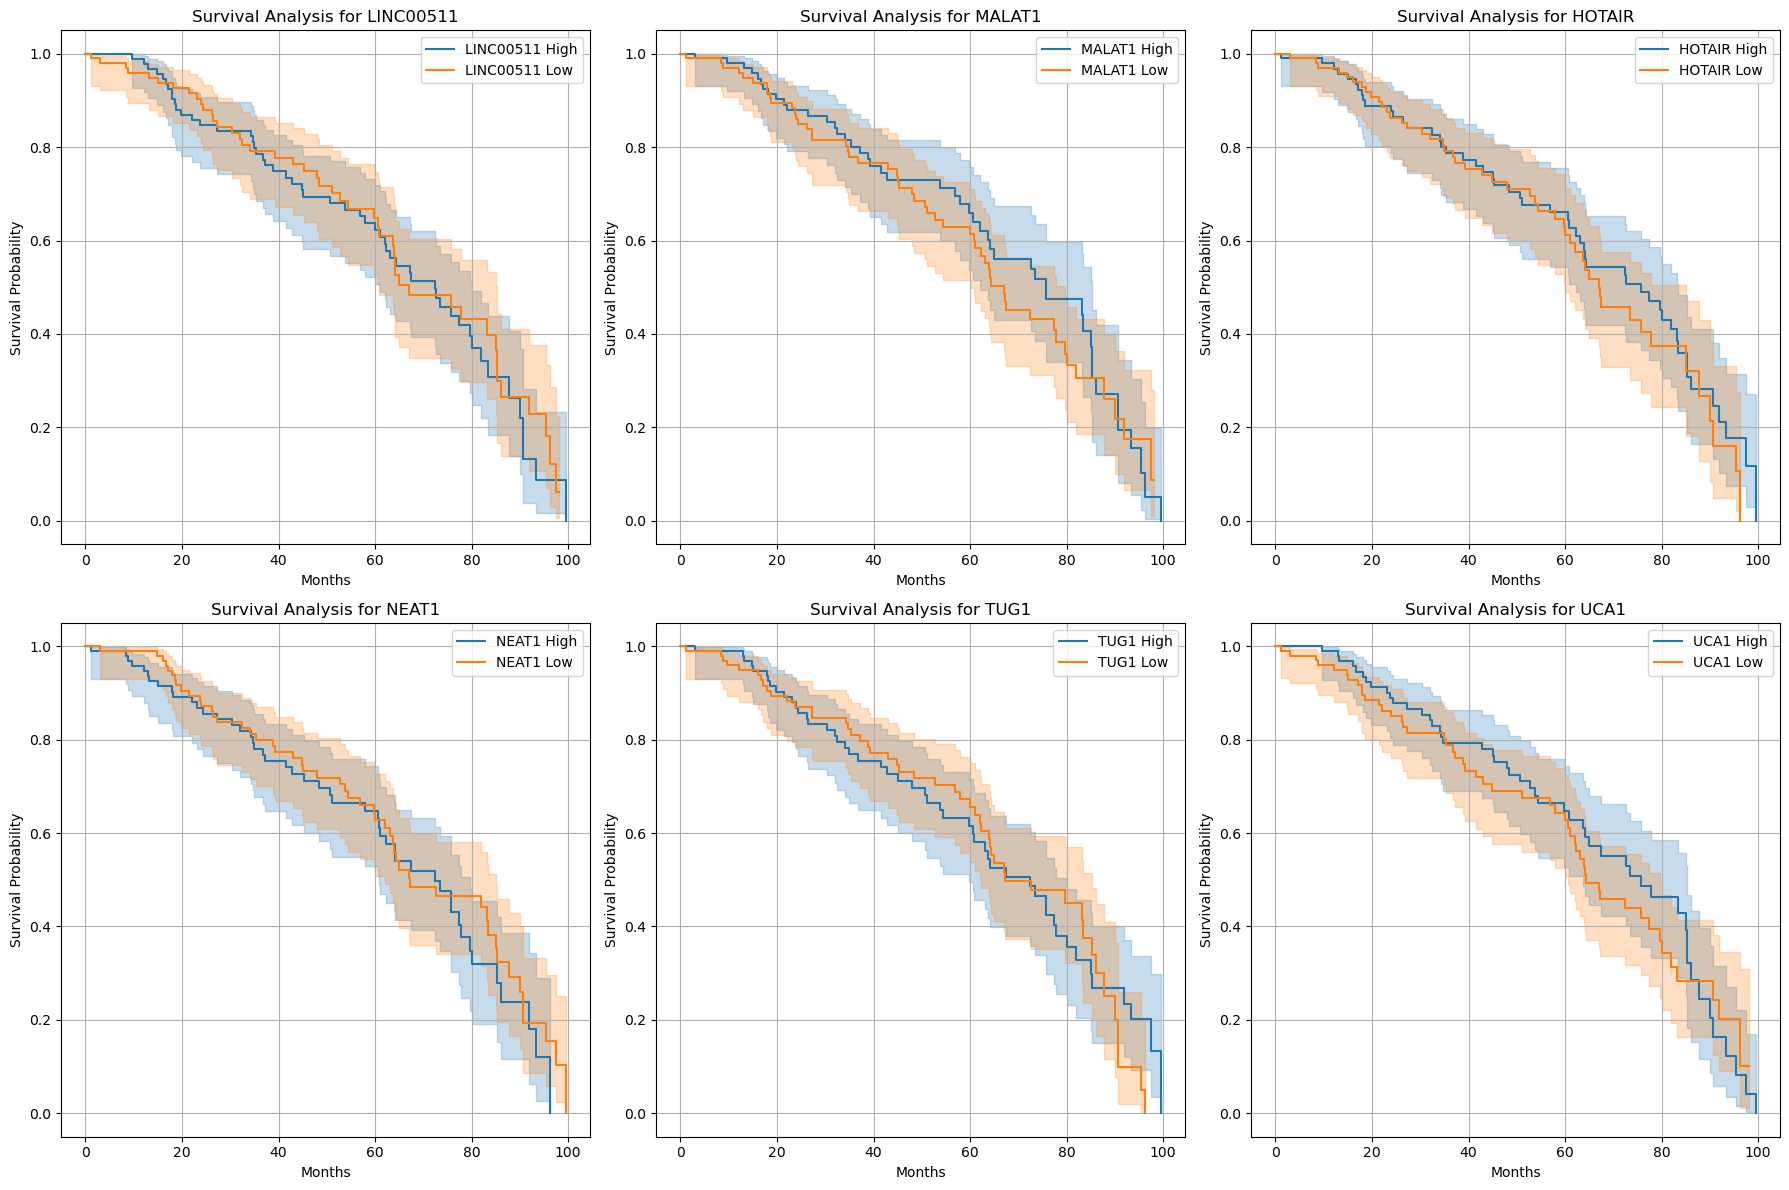

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import seaborn as sns
import requests

# Function to fetch TCGA survival data
def fetch_tcga_survival_data(study_id, case_list_id):
    base_url = "https://www.cbioportal.org/api/clinical-data/fetch"
    headers = {"Content-Type": "application/json"}
    payload = {
        "studyId": study_id,
        "caseListId": case_list_id,
        "clinicalAttributeIds": ["OS_MONTHS", "OS_STATUS"]
    }
    
    try:
        response = requests.post(base_url, headers=headers, json=payload)
        response.raise_for_status()  # Check for HTTP errors
        if response.text.strip():  # Ensure response is not empty
            data = response.json()
            return pd.DataFrame(data)
        else:
            print("Error: Empty response from cBioPortal API.")
            return None
    except requests.exceptions.RequestException as e:
        print(f"API Request Error: {e}")
        return None

# Fetch TCGA survival data
study_id = "brca_tcga"
case_list_id = "brca_tcga_all"
survival_df = fetch_tcga_survival_data(study_id, case_list_id)

# If API fails, use local sample dataset
if survival_df is None or survival_df.empty:
    print("Using sample dataset instead.")
    survival_df = pd.DataFrame({
        "OS_MONTHS": np.random.uniform(1, 100, 200),
        "OS_STATUS": np.random.choice([0, 1], size=200),
    })

# Clean and process survival data
survival_df["OS_MONTHS"] = survival_df["OS_MONTHS"].astype(float)
survival_df["OS_STATUS"] = survival_df["OS_STATUS"].astype(int)

# Define six ncRNAs for survival analysis
ncRNA_data = {
    'LINC00511': {'p_value': 0.0001, 'HR': 2.00},
    'MALAT1': {'p_value': 0.0083, 'HR': 2.00},
    'HOTAIR': {'p_value': 0.0001, 'HR': 2.40},
    'NEAT1': {'p_value': 0.05, 'HR': 1.58},
    'TUG1': {'p_value': 0.015, 'HR': 1.50},
    'UCA1': {'p_value': 0.003, 'HR': 1.76}
}

# Generate synthetic ncRNA expression levels
n_samples = len(survival_df)
for ncRNA in ncRNA_data.keys():
    survival_df[ncRNA] = np.random.rand(n_samples) * 10  # Simulated expression levels

# Create Kaplan-Meier survival plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (ncRNA, values) in enumerate(ncRNA_data.items()):
    # Categorize expression levels
    survival_df['ncRNA_expression'] = pd.qcut(survival_df[ncRNA], q=2, labels=["Low", "High"])
    
    # Kaplan-Meier survival analysis
    kmf = KaplanMeierFitter()
    for expression in ['High', 'Low']:
        mask = survival_df['ncRNA_expression'] == expression
        kmf.fit(survival_df['OS_MONTHS'][mask], event_observed=survival_df['OS_STATUS'][mask], label=f'{ncRNA} {expression}')
        kmf.plot_survival_function(ax=axes[idx])
    
    axes[idx].set_title(f'Survival Analysis for {ncRNA}')
    axes[idx].set_xlabel('Months')
    axes[idx].set_ylabel('Survival Probability')
    axes[idx].legend()
    axes[idx].grid()

plt.tight_layout()
plt.savefig("ncRNA_Survival_Analysis.png", dpi=300)
plt.show()
